In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from utils import plot_ds

In [74]:
dataObj = datasets.load_iris()

In [75]:
dir(dataObj)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [76]:
# print(dataObj.DESCR)

In [77]:
print(dataObj.feature_names)
print(dataObj.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [78]:
df = pd.DataFrame(dataObj.data, columns=dataObj.feature_names)
df["target"] = dataObj.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [80]:
df.shape

(150, 5)

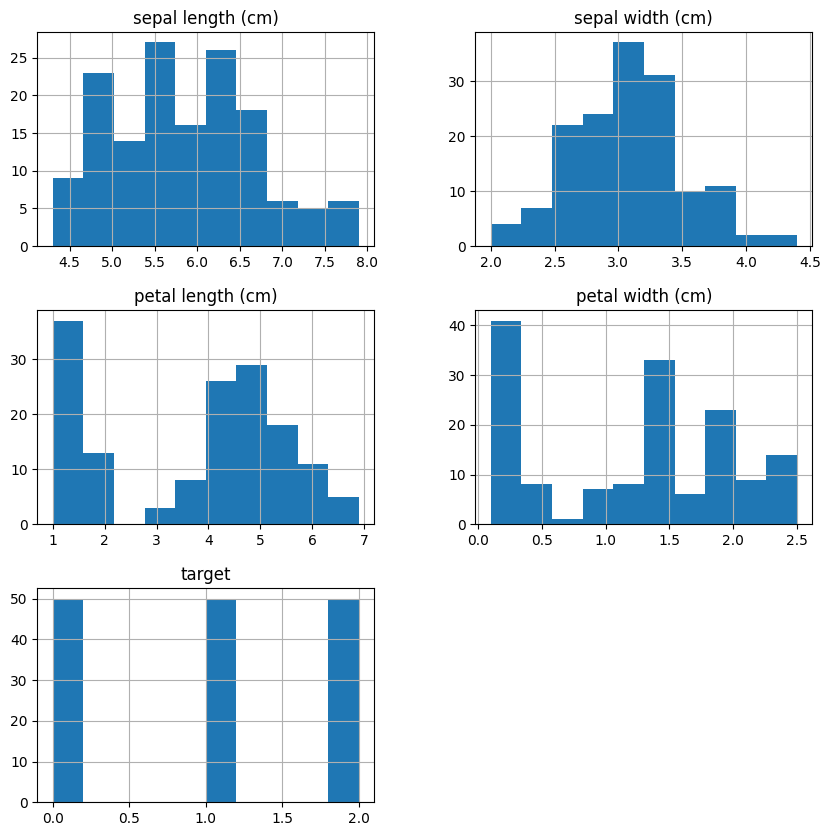

In [81]:
df.hist(figsize=(10,10))
display()

<Axes: >

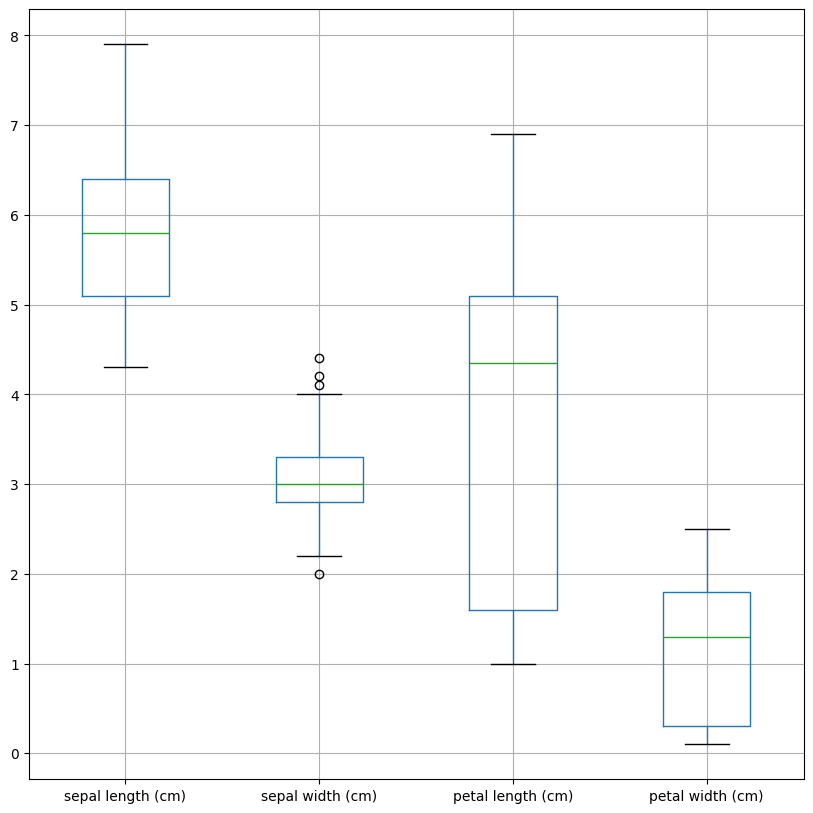

In [82]:
df.iloc[:,0:4].boxplot(figsize=(10,10))

In [83]:
df2 = df.iloc[:,[2,3,4]]

In [84]:
df2["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [85]:
filt = (df2["target"] == 0) | (df2["target"] == 1)
df3 = df2[filt]

In [86]:
df3["target"].value_counts()

target
0    50
1    50
Name: count, dtype: int64

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

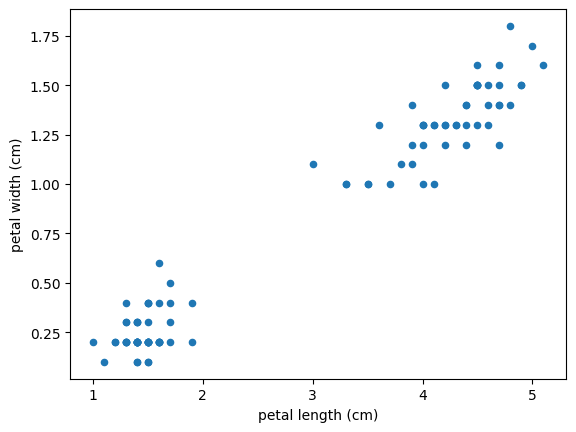

In [87]:
df3.plot.scatter(x="petal length (cm)", y="petal width (cm)" )

In [88]:
df3.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [89]:
X = df3.iloc[:,0:2].values
y = df3["target"].values

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>]],
      dtype=object)

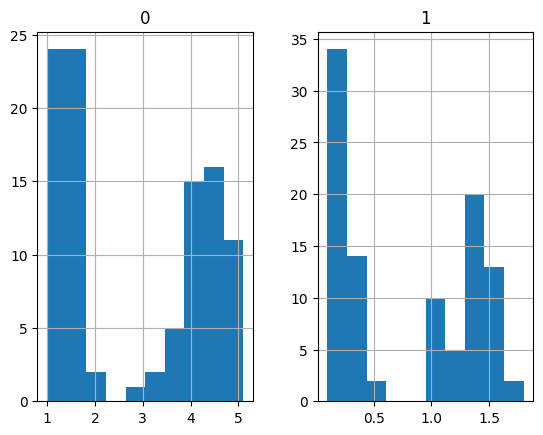

In [91]:
pd.DataFrame(X).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

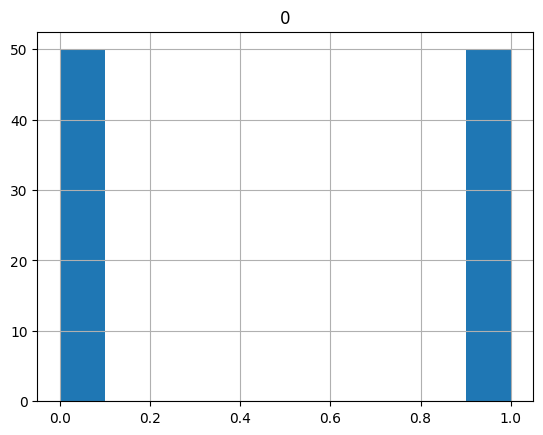

In [92]:
pd.DataFrame(y).hist()

In [93]:
sc = StandardScaler()

In [94]:
#dir(sc)

In [95]:
sc.fit(X_train)

StandardScaler()

In [96]:
sc.var_

array([2.10186939, 0.30951224])

In [97]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

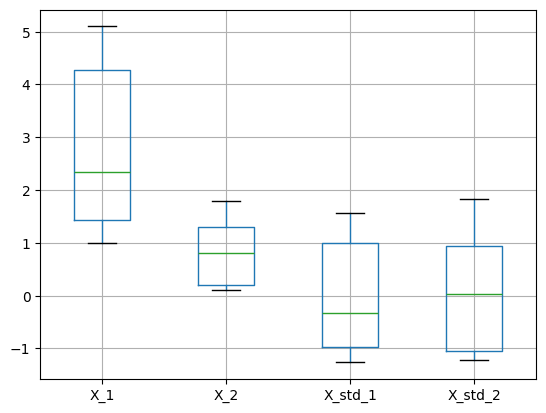

In [98]:
np.concatenate((X_train, X_train_std), axis=1)
cols = ["X_1", "X_2", "X_std_1", "X_std_2"]
temp = pd.DataFrame(np.concatenate((X_train, X_train_std), axis=1), columns=cols)
temp.head()
temp.boxplot()
display()

In [157]:
eta0 = 1000
random_state = 1
n_iter_no_change = 10

In [158]:
ppn = Perceptron(eta0=eta0, random_state=random_state, n_iter_no_change=n_iter_no_change, verbose=1)

In [159]:
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 70, Avg. loss: 1.000130
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 140, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 280, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 350, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 420, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 490, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 560, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1975.74, NNZs: 2, Bias: 0.000000, T: 630, Avg. loss: 0.000000
Total trai

Perceptron(eta0=1000, n_iter_no_change=10, random_state=1, verbose=1)

In [102]:
y_pred = ppn.predict(X_train_std)

In [109]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0])

In [103]:
y_train

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0])

In [104]:
accuracy_score(y_train, y_pred)

1.0

In [105]:
ppn.predict(X_test_std)

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [106]:
y_test

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [107]:
accuracy_score(y_test, ppn.predict(X_test_std))

1.0

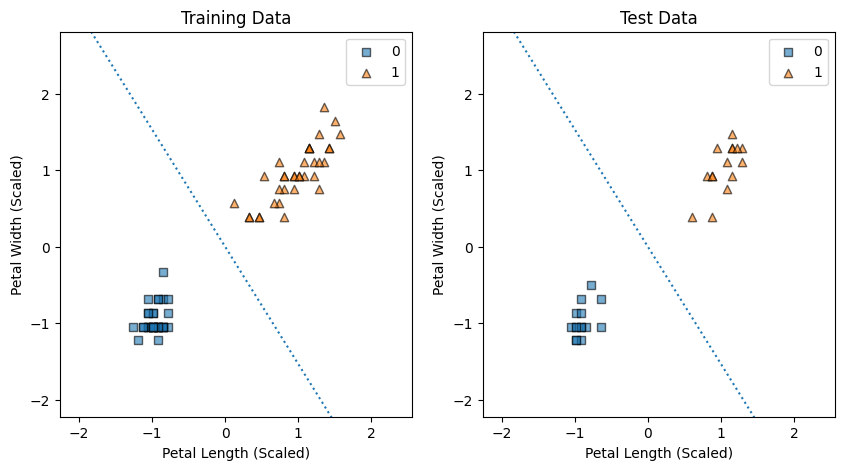

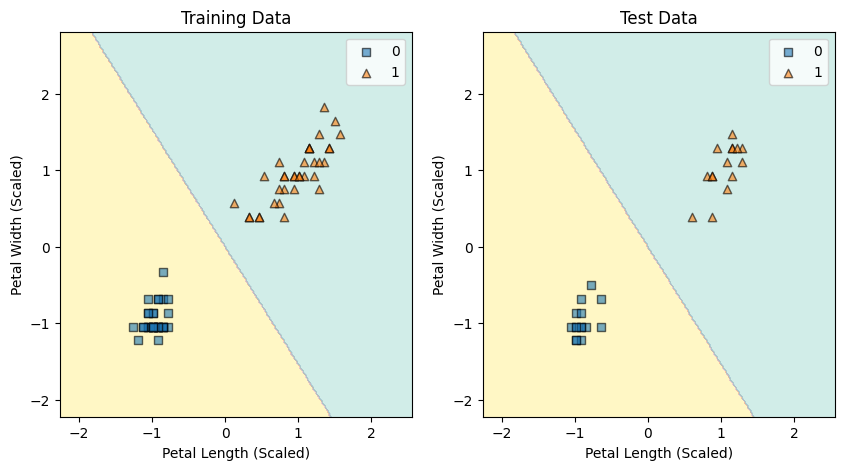

In [108]:
plot_ds(X_train_std, X_test_std, y_train, y_test, ppn)

In [113]:
X.shape

(100, 2)

In [119]:
X1_min = X[:, 0].min()
X1_max = X[:, 0].max()
X2_min = X[:, 1].min()
X2_max = X[:, 1].max()

In [137]:
X1_new = np.random.uniform(low=X1_min, high=X1_max, size=(50, 1))
X2_new = np.random.uniform(low=X2_min, high=X2_max, size=(50, 1))

In [143]:
X_new = np.concatenate((X1_new, X2_new), axis=1)


In [144]:
temp = pd.DataFrame(X_new, columns=["X1", "X2"])
temp.head()

,X1,X2
0,4.291952,0.900342
1,3.946084,1.570564
2,2.347778,0.565917
3,4.092665,0.605060
4,1.635767,1.520439


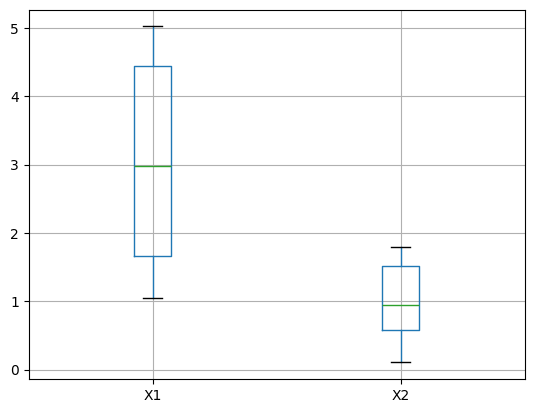

In [145]:
temp.boxplot()
display()

In [146]:
X_new_std = sc.transform(X_new)

<Axes: xlabel='X1', ylabel='X2'>

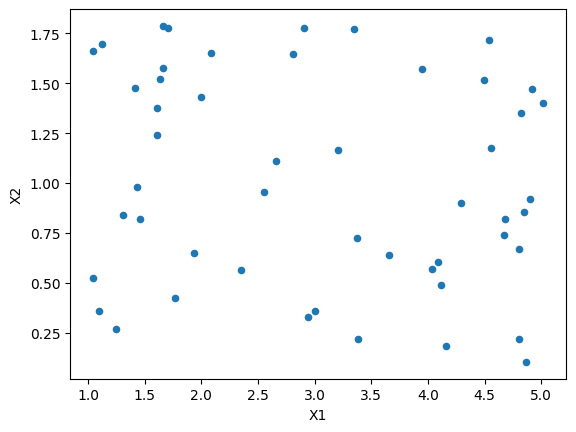

In [149]:
temp.plot.scatter(x='X1', y='X2')

In [150]:
ppn.predict(X_new_std)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0])